## Código para analisar as chances de sucesso na sequência aleatória (Random-walk) proposta.
Você acha que consegue subir até o 60º degrau de um prédio após 100 rodadas de lançamento do dado? As regras são: se sair 1 ou 2, você deve retornar 1 degrau. Se sair 3, 4 ou 5, avançar 1 degrau. Caso saia o número 6, um novo lançamento é feito e o número obtido será o número de degraus avançados.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(123)

In [18]:
all_walks = []

Para simular a nossa random-walk e ter simulações suficientes iremos realizar 500 repetições. 

In [19]:
for i in range(500):
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001:
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

Em seguida, precisaremos criar e tranpor a array obtida a partir da lista all_walks:

In [20]:
np_aw_t = np.transpose(np.array(all_walks))

Agora, iremos selecionar a última linha de todas as walks, as quais têm o resultado final de cada experimento, a fim de visualizarmos a distribuição dos resultados e de calcularmos a probabilidade estimada.

In [21]:
ends = np_aw_t[-1,:]

Plotagem de Histograma com os valores dos ends.

In [22]:
%matplotlib inline

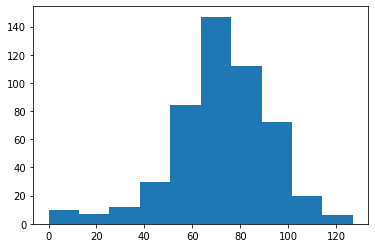

In [23]:
plt.hist(ends)
plt.show()

Quantos sucessos foram obtidos no rol das nossas 500 simulações:

In [36]:
ends[ends > 60]

array([ 70,  94,  82,  66, 107,  72, 116,  65,  78,  87,  81,  75,  70,
        77,  88,  74,  64,  63,  70,  93,  98,  70,  70,  72,  71,  78,
        78,  79,  71,  83,  71,  63,  94,  72,  63,  74,  61,  61,  79,
        91,  66,  70,  80,  89,  91,  61,  83,  71,  68,  74,  85,  68,
        88,  64,  84, 114,  61,  65,  78,  63,  61,  90,  96,  83,  77,
        80,  71,  87,  73,  85,  84,  76, 105,  98,  63, 112,  81, 101,
        74,  77,  81,  97,  90,  66,  63,  91, 101,  81,  64,  95,  83,
        99,  75,  75,  61,  97,  94,  76,  82,  86, 122, 110,  91,  94,
       106,  74,  75,  93,  64,  76, 100,  66,  98,  94,  72,  85,  66,
        69,  78,  81,  87,  75,  80,  97,  75,  67,  78,  87,  87,  80,
        80, 108,  83,  76,  73,  75, 116, 106,  78,  76, 103, 101,  80,
        73,  66,  93,  92,  63,  89,  72,  94,  79,  63,  88, 109,  88,
        95,  74,  70,  80,  89,  77,  83,  72,  65,  87,  80,  67,  65,
        70,  86, 104,  69,  76,  76,  64, 102,  66,  71,  73,  8

Para calcular o número de elementos de uma Numpy Array podemos usar o método .size

In [37]:
ends[ends > 60].size

383

A probabilidade estimada obtida é a relação do número de sucessos pela quantidade total de walks.

In [34]:
383/500

0.766